Good examples comparing `MolsToGridImage` and `MolsMatrixToGridImage`: https://greglandrum.github.io/rdkit-blog/posts/2023-10-25-molsmatrixtogridimage.html

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

import matplotlib
import numpy as np
import pandas as pd

# Read in data

In [2]:
df = pd.read_csv('data/ESOL/delaney.csv')
df

,smiles,logSolubility
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770
1,Cc1occc1C(=O)Nc2ccccc2,-3.300
2,CC(C)=CCCC(C)=CC(=O),-2.060
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870
4,c1ccsc1,-1.330
...,...,...
1123,FC(F)(F)C(Cl)Br,-1.710
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106
1125,CCSCCSP(=S)(OC)OC,-3.091
1126,CCC(C)C,-3.180


In [3]:
df['murcko'] = df.smiles.apply(MurckoScaffold.MurckoScaffoldSmiles)

In [4]:
df.murcko.value_counts()

murcko
                               317
c1ccccc1                       254
c1ccc(-c2ccccc2)cc1             39
c1ccc2ccccc2c1                  22
O=C1CC(=O)NC(=O)N1              21
                              ... 
O=c1cc(-c2ccccc2)oc2ccccc12      1
O=C1C2C3C4CC5C3C1C5C42           1
C1=CC(C2C=CC=C2)C=C1             1
O=C1CCC2c3ccc4ccccc4c3CCC12      1
O=C1NC(c2ccccc2)c2ccccc21        1
Name: count, Length: 269, dtype: int64

# Show simple example of MolsToGridImage

In [5]:
MOLS = []
LEGENDS = []
for i, row in df.iterrows():
    mol = Chem.MolFromSmiles(row.smiles)
    MOLS.append(mol)
    LEGENDS.append(f'log solubility: {row.logSolubility}')
    if i > 10:
        break

## Example of saving as SVG

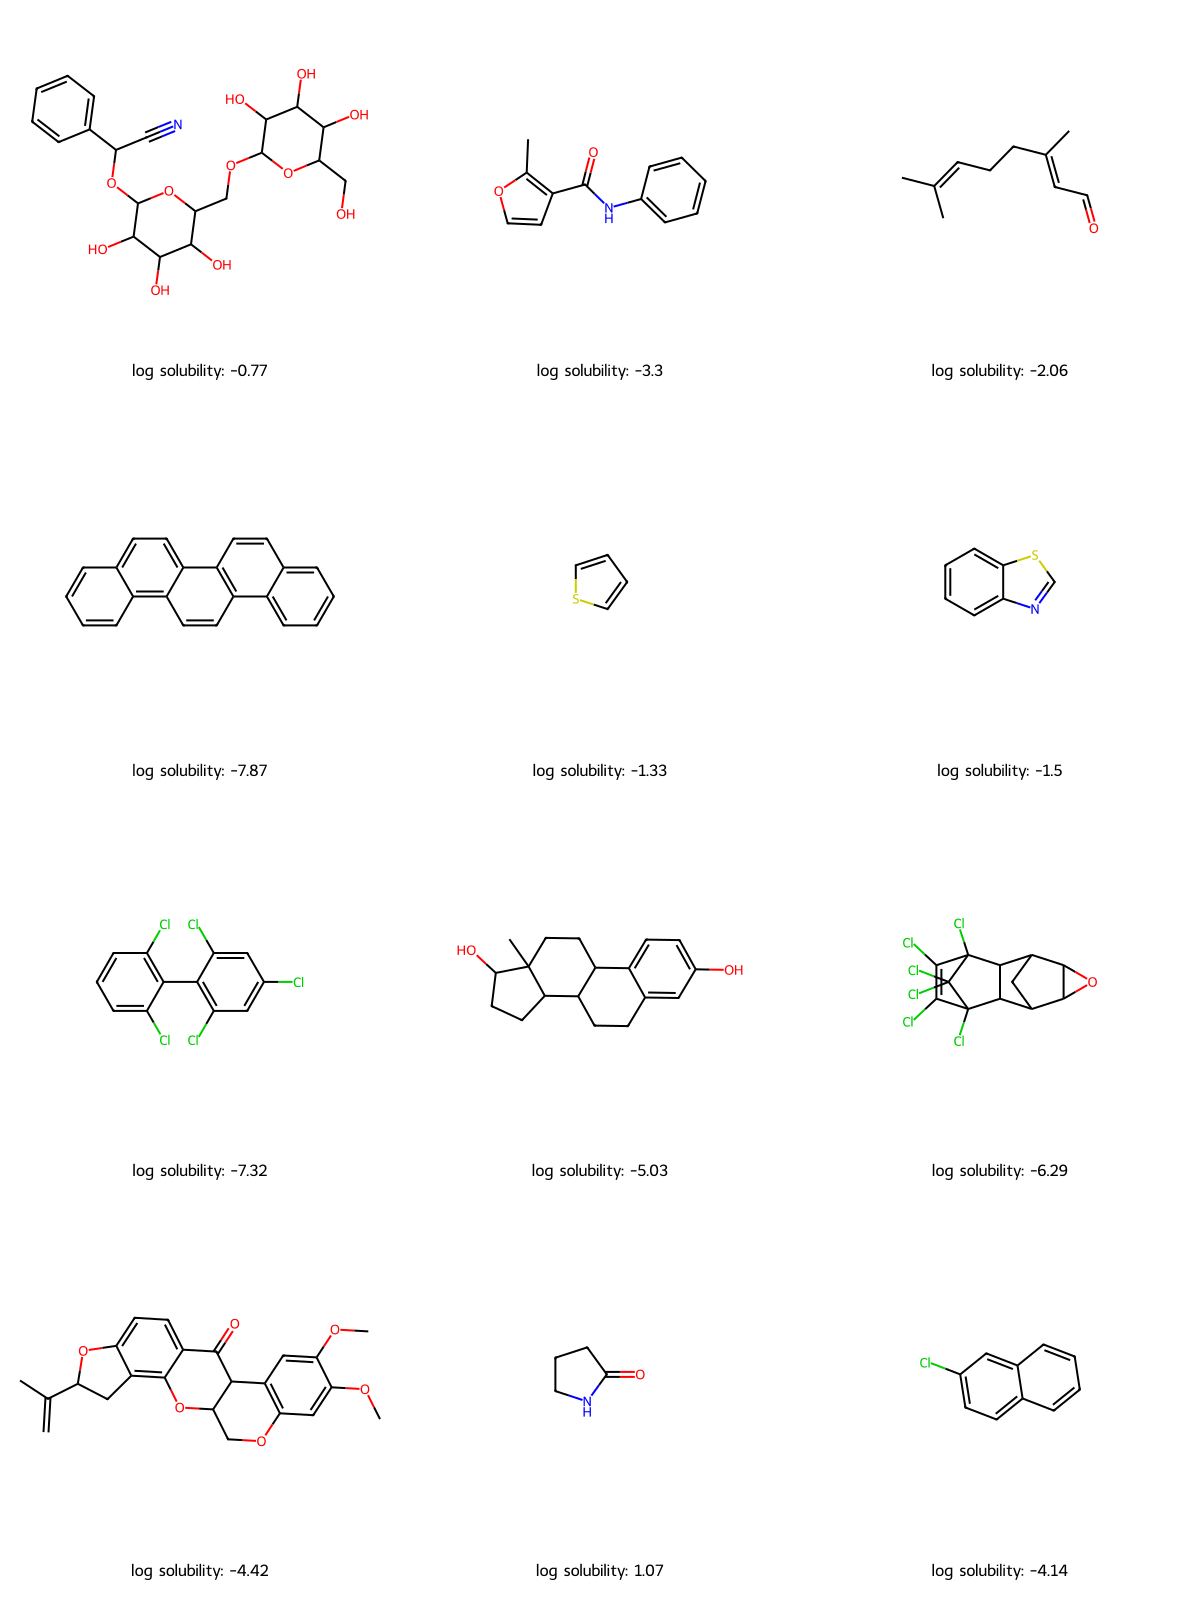

In [6]:
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           molsPerRow=3,
                           useSVG=True,
                           maxMols=999,
                           )
img

In [7]:
with open('MolsToGridImage_test.svg', 'w') as f:
    f.write(img.data)

## Example of saving as PNG

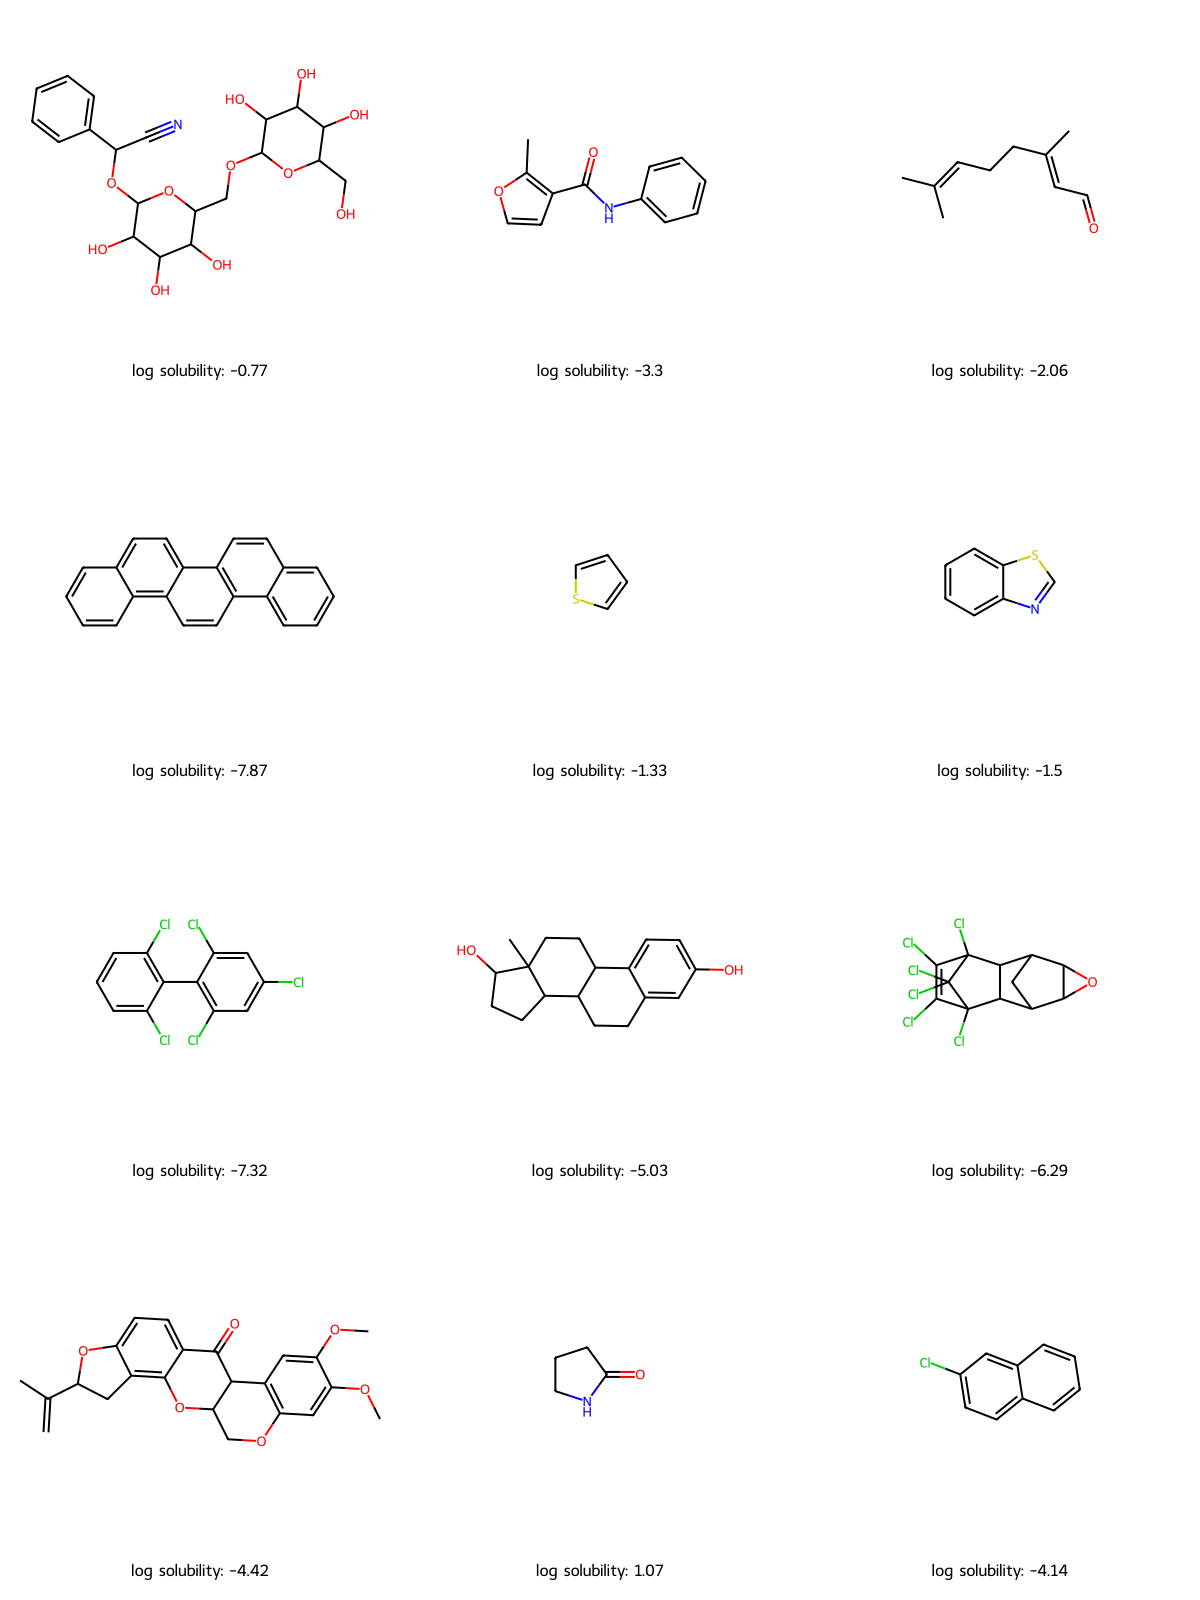

In [8]:
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           molsPerRow=3,
                           useSVG=False,
                           returnPNG=False,
                           maxMols=999,
                           )
img

In [9]:
img.save('MolsToGridImage_test.png')

# Example of highlighting substructures

In [10]:
# use one of the Bemis-Murcko scaffolds from above
df.murcko.value_counts()

murcko
                               317
c1ccccc1                       254
c1ccc(-c2ccccc2)cc1             39
c1ccc2ccccc2c1                  22
O=C1CC(=O)NC(=O)N1              21
                              ... 
O=c1cc(-c2ccccc2)oc2ccccc12      1
O=C1C2C3C4CC5C3C1C5C42           1
C1=CC(C2C=CC=C2)C=C1             1
O=C1CCC2c3ccc4ccccc4c3CCC12      1
O=C1NC(c2ccccc2)c2ccccc21        1
Name: count, Length: 269, dtype: int64

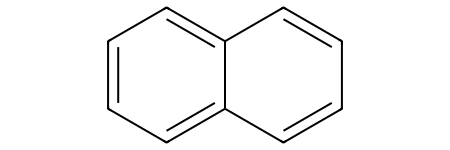

In [11]:
pattern = Chem.MolFromSmiles('c1ccc2ccccc2c1')
pattern

In [12]:
MOLS = []
LEGENDS = []
HIGHLIGHT_ATOMS_LIST = []
HIGHLIGHT_BONDS_LIST = []
HIGHLIGHT_COLOR_LIST = []
for i, row in df.iterrows():
    mol = Chem.MolFromSmiles(row.smiles)
    match = mol.GetSubstructMatches(pattern)
    if match:
        MOLS.append(mol)
        LEGENDS.append(f'log solubility: {row.logSolubility}')
        HIGHLIGHT_ATOMS_LIST.append(match[0])
        HIGHLIGHT_BONDS_LIST.append([])   # append empty list to not highlight bonds
        HIGHLIGHT_COLOR_LIST.append((0.4, 0.9, 0.1))  # use a light green color instead of red
        if i > 100:
            break

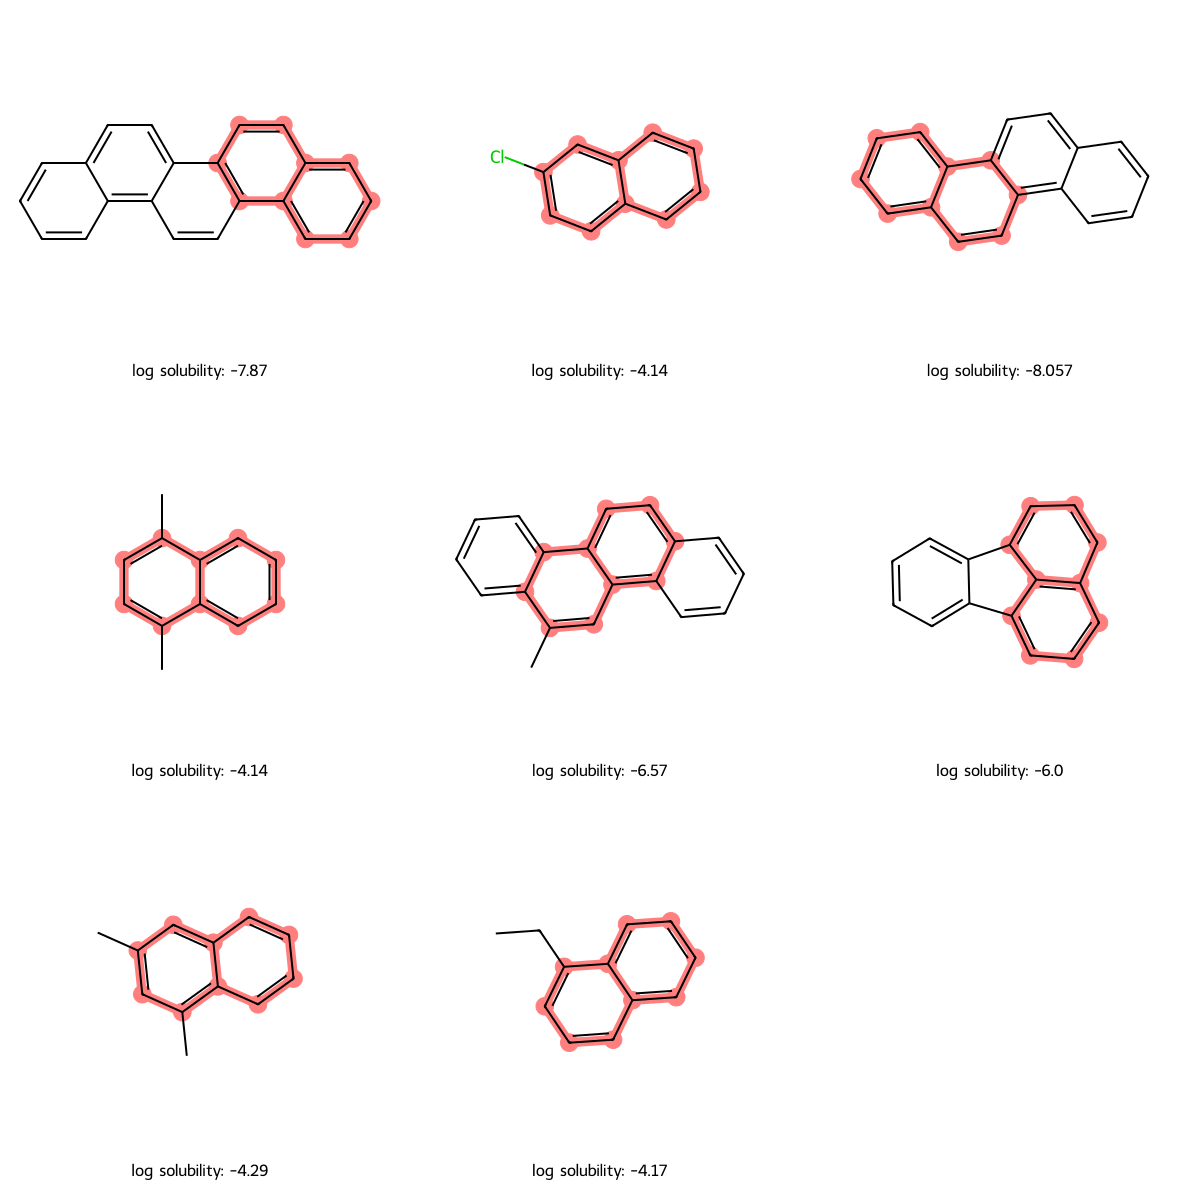

In [13]:
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           highlightAtomLists=HIGHLIGHT_ATOMS_LIST,
                           molsPerRow=3,
                           useSVG=True,
                           maxMols=999,
                           )
img

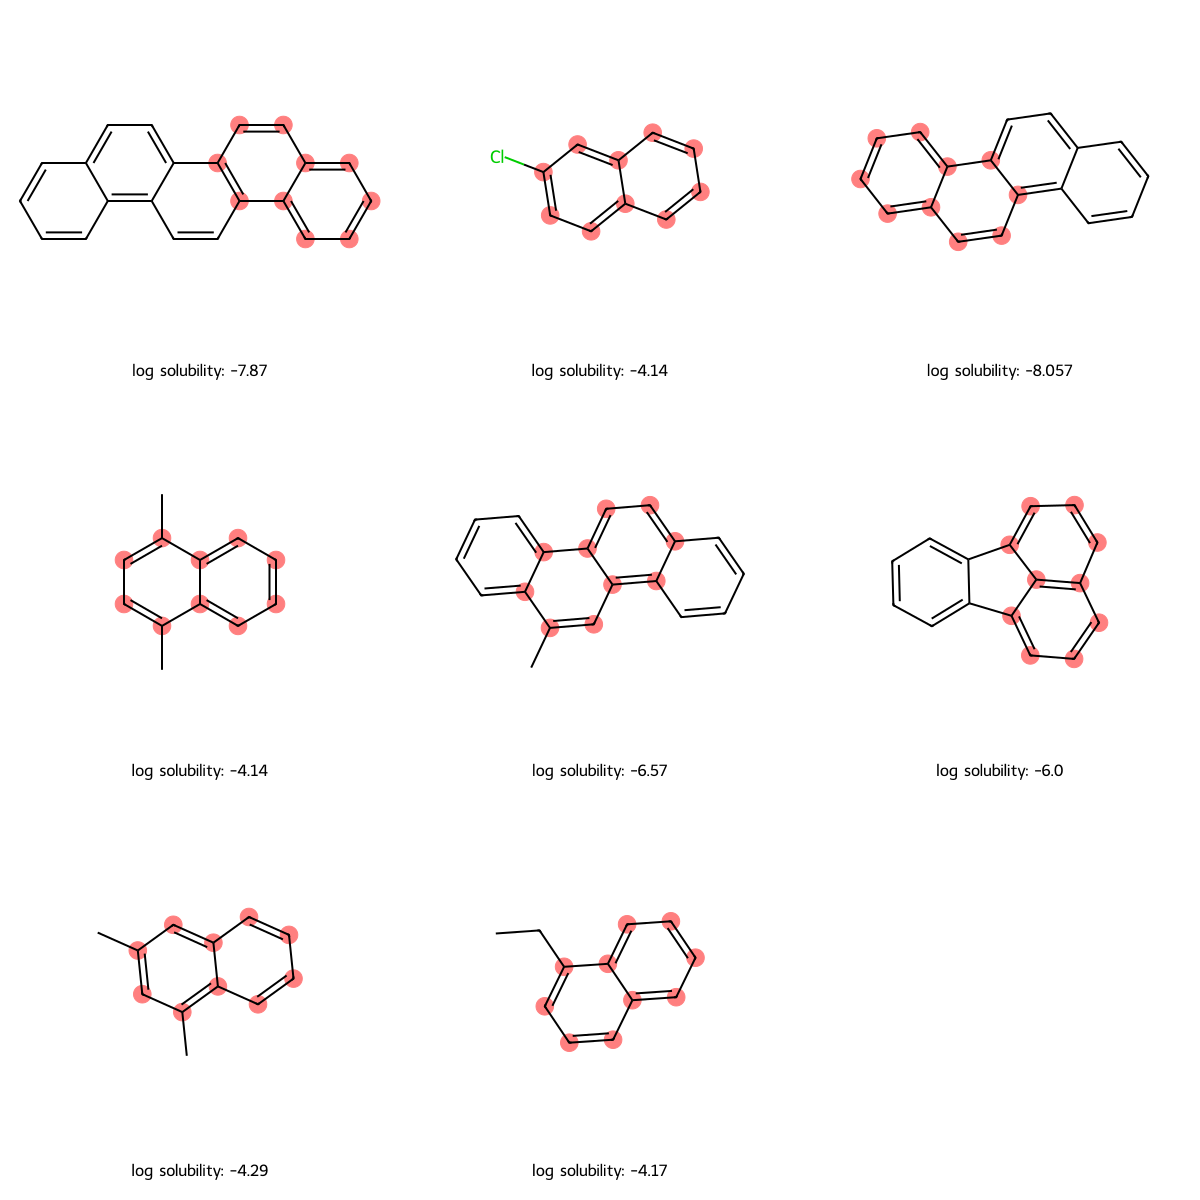

In [14]:
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           highlightAtomLists=HIGHLIGHT_ATOMS_LIST,
                           highlightBondLists=HIGHLIGHT_BONDS_LIST,
                           molsPerRow=3,
                           useSVG=True,
                           maxMols=999,
                           )
img

In theory, we should be able to change the color of the highlighted atoms and bonds. But it's not a keyword argument
https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html#rdkit.Chem.Draw.MolsToGridImage

and Greg hasn't gotten around to it since 2016 https://github.com/rdkit/rdkit/issues/974

In [15]:
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           highlightAtomLists=HIGHLIGHT_ATOMS_LIST,
                           highlightBondLists=HIGHLIGHT_BONDS_LIST,
                           highlightAtomColors=(0.4, 0.9, 0.1),
                           molsPerRow=3,
                           useSVG=True,
                           maxMols=999,
                           )
img

ValueError: If highlightAtomMap is provided it must be the same length as the molecule list.

In [16]:
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           highlightAtomLists=HIGHLIGHT_ATOMS_LIST,
                           highlightBondLists=HIGHLIGHT_BONDS_LIST,
                           highlightAtomColors=HIGHLIGHT_COLOR_LIST,
                           molsPerRow=3,
                           useSVG=True,
                           maxMols=999,
                           )
img

TypeError: Expecting an object of type dict; got an object of type tuple instead

In [17]:
color = matplotlib.colors.ColorConverter().to_rgb('green')
color

(0.0, 0.5019607843137255, 0.0)

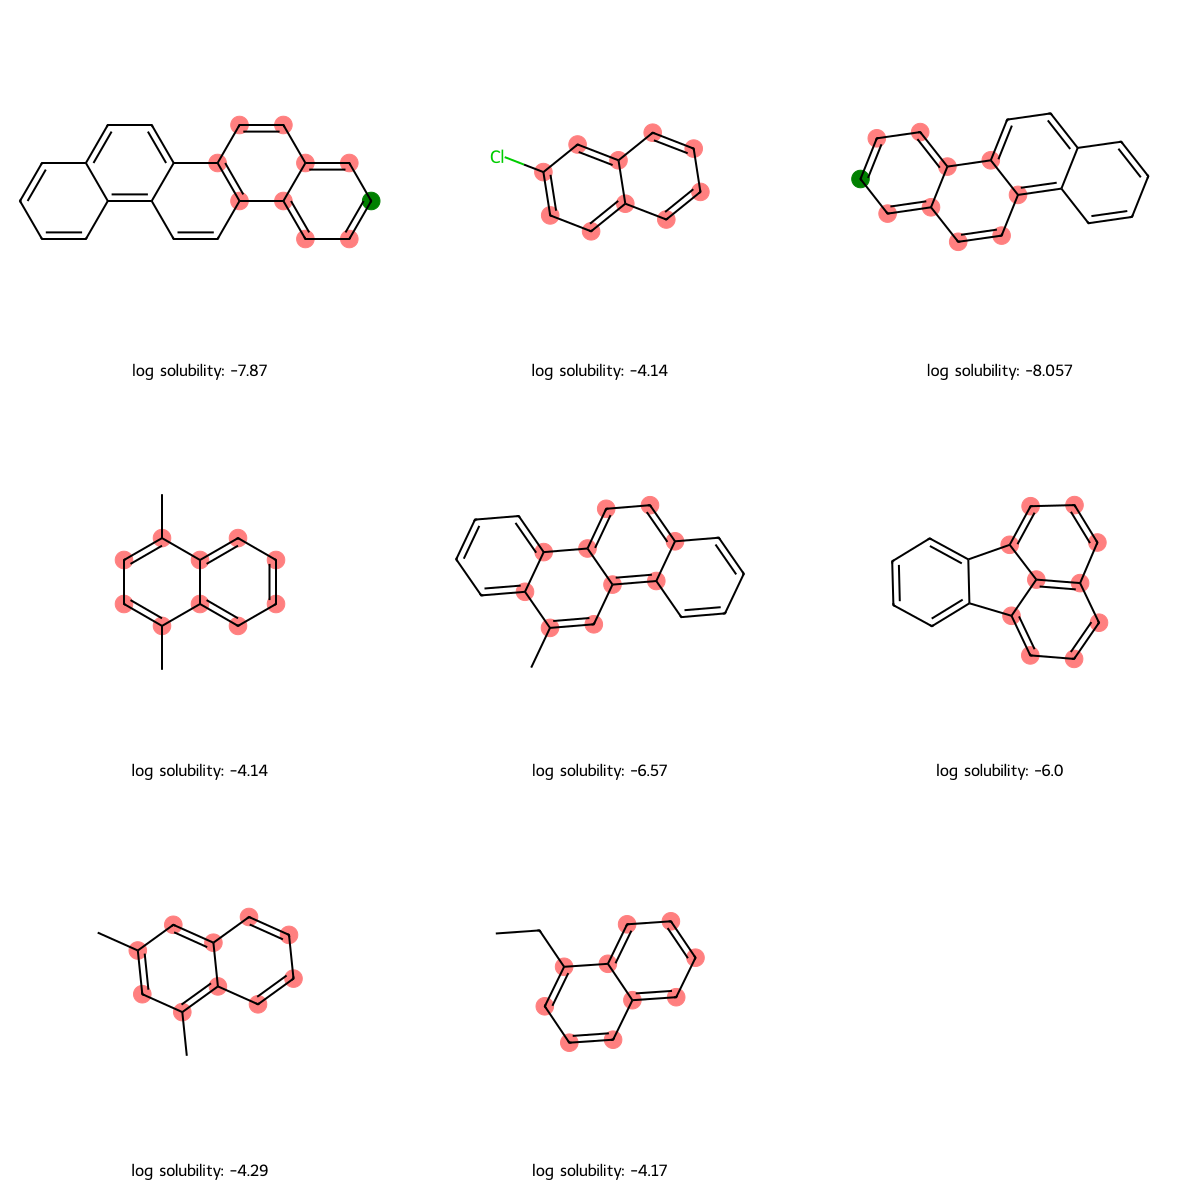

In [18]:
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           highlightAtomLists=HIGHLIGHT_ATOMS_LIST,
                           highlightBondLists=HIGHLIGHT_BONDS_LIST,
                           # this just highlights the atom with corresponding index...
                           highlightAtomColors=[{0: color}]*len(MOLS),
                           molsPerRow=3,
                           useSVG=True,
                           maxMols=999,
                           )
img

### Very hacky way to do it but it's doable...
https://www.mail-archive.com/rdkit-discuss@lists.sourceforge.net/msg08559.html

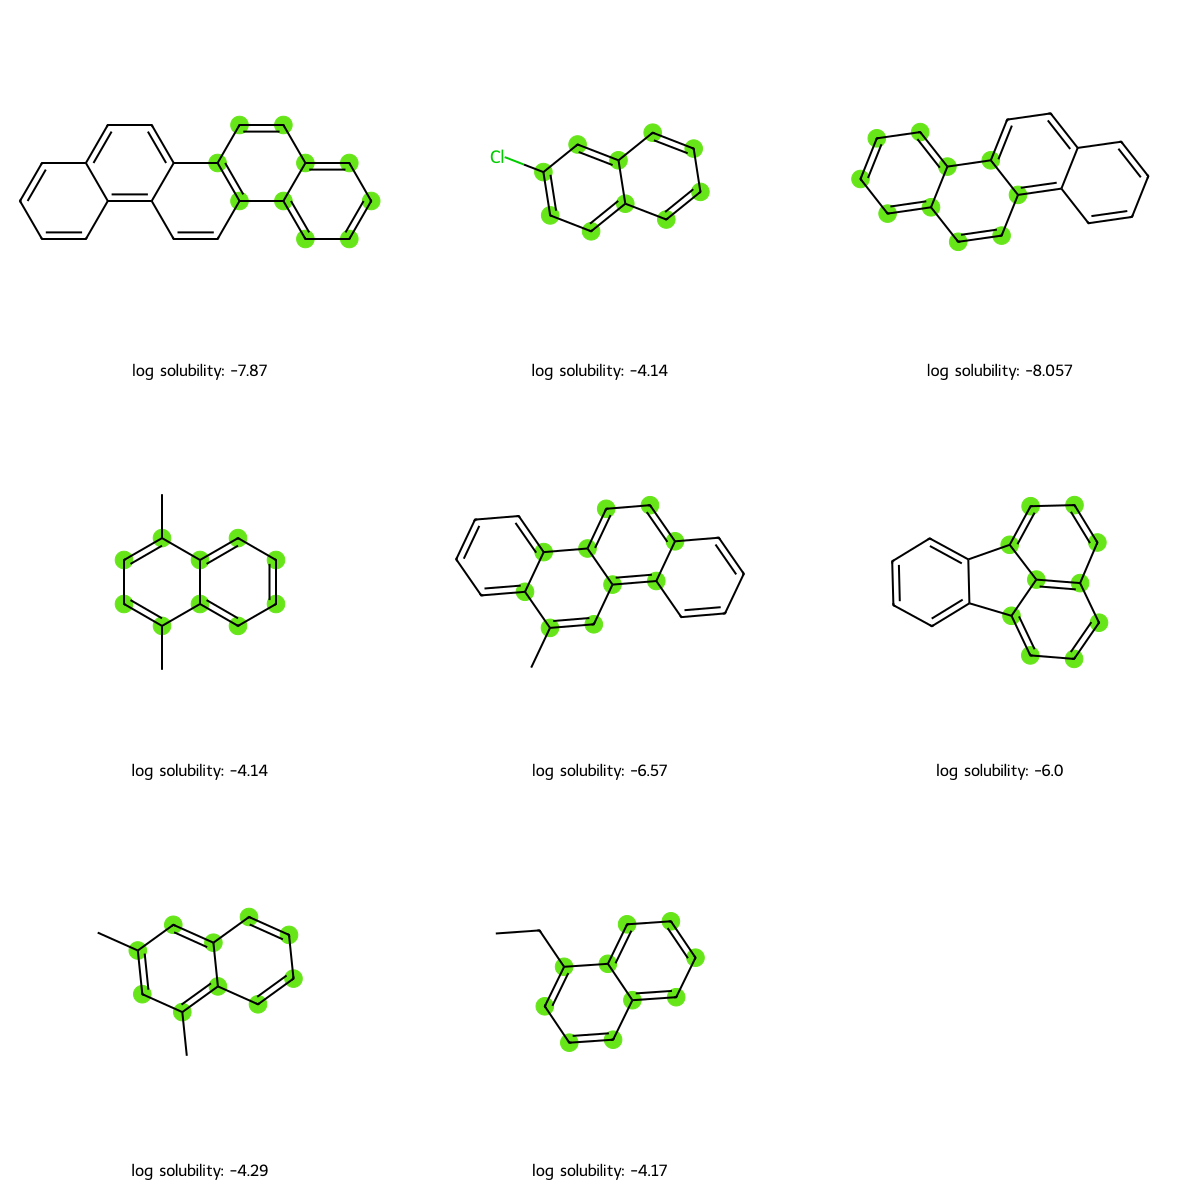

In [19]:
size = 400
img = Draw.MolsToGridImage(MOLS,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           highlightAtomLists=HIGHLIGHT_ATOMS_LIST,
                           highlightBondLists=HIGHLIGHT_BONDS_LIST,
                           # this just highlights the atom with corresponding index...
                           highlightAtomColors=[{i: (0.4, 0.9, 0.1) for i in range(20)}]*len(MOLS),
                           molsPerRow=3,
                           useSVG=True,
                           maxMols=999,
                           )
img